In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import glob
import torch
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as trns
import torch.nn as nn
from torchmetrics import JaccardIndex
from sklearn.model_selection import train_test_split
from PIL import ImageColor
import matplotlib.patches as mpatches
import torchvision
import cv2
from patchify import patchify
from PIL import Image

In [29]:
class CustomData(Dataset):
    def __init__(self, train=True):
        self.patch_size = 256
        self.images = []
        self.masks = []
        folders = glob.glob("../data/*")
        for f in folders:
            files = glob.glob(f"{f}/*")
            self.images.append(glob.glob(f"{files[0]}/*")); self.masks.append(glob.glob(f"{files[1]}/*"))
        self.images= np.array(self.images).reshape(-1); self.masks = np.array(self.masks).reshape(-1)
        X_train, X_test, y_train, y_test = train_test_split(self.images, self.masks, test_size=0.2, shuffle=True)
        self.np_images = []
        self.np_masks = []


        trans = trns.Compose([trns.ToTensor()])
        if train:
            for li, lm in zip(X_train, y_train):
                image = cv2.imread(li, 1)  #Read each image as BGR
                SIZE_X = (image.shape[1]//self.patch_size)*self.patch_size #Nearest size divisible by our patch size
                SIZE_Y = (image.shape[0]//self.patch_size)*self.patch_size #Nearest size divisible by our patch size
                image = Image.fromarray(image)
                image = image.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #image = image.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                image = np.array(image)             
       
                #Extract patches from each image
                print("Now patchifying image:", li)
                patches_img = patchify(image, (self.patch_size, self.patch_size, 3), step=self.patch_size)

                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        
                        single_patch_img = patches_img[i,j,:,:]
                        
                        #Use minmaxscaler instead of just dividing by 255.
                        
                        single_patch_img = trans(single_patch_img[0])
                                  
                        self.np_images.append(single_patch_img)
                        
                mask = cv2.imread(lm)  #Read each image as Grey (or color but remember to map each color to an integer)
                mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
                SIZE_X = (mask.shape[1]//self.patch_size)*self.patch_size #Nearest size divisible by our patch size
                SIZE_Y = (mask.shape[0]//self.patch_size)*self.patch_size #Nearest size divisible by our patch size
                mask = Image.fromarray(mask)
                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #mask = mask.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                mask = np.array(mask)             
       
                #Extract patches from each image
                print("Now patchifying mask:", lm)
                patches_mask = patchify(mask, (self.patch_size, self.patch_size, 3), step=self.patch_size)

                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        
                        single_patch_mask = patches_mask[i,j,:,:]
                        
                        single_patch_mask = trans(single_patch_mask[0])
                                                    
                        self.np_masks.append(single_patch_mask) 
                
        else:
            for li, lm in zip(X_test, y_test):
                image = cv2.imread(li, 1)  #Read each image as BGR
                SIZE_X = (image.shape[1]//self.patch_size)*self.patch_size #Nearest size divisible by our patch size
                SIZE_Y = (image.shape[0]//self.patch_size)*self.patch_size #Nearest size divisible by our patch size
                image = Image.fromarray(image)
                image = image.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #image = image.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                image = np.array(image)             
       
                #Extract patches from each image
                print("Now patchifying image:", li)
                patches_img = patchify(image, (self.patch_size, self.patch_size, 3), step=self.patch_size)

                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        
                        single_patch_img = patches_img[i,j,:,:]
                        
                        #Use minmaxscaler instead of just dividing by 255.
                        
                        single_patch_img = trans(single_patch_img[0])
                                  
                        self.np_images.append(single_patch_img)
                        
                mask = cv2.imread(lm)  #Read each image as Grey (or color but remember to map each color to an integer)
                mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
                SIZE_X = (mask.shape[1]//self.patch_size)*self.patch_size #Nearest size divisible by our patch size
                SIZE_Y = (mask.shape[0]//self.patch_size)*self.patch_size #Nearest size divisible by our patch size
                mask = Image.fromarray(mask)
                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #mask = mask.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                mask = np.array(mask)             
       
                #Extract patches from each image
                print("Now patchifying mask:", lm)
                patches_mask = patchify(mask, (self.patch_size, self.patch_size, 3), step=self.patch_size)

                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        
                        single_patch_mask = patches_mask[i,j,:,:]
                        
                        single_patch_mask = trans(single_patch_mask[0])
                                                    
                        self.np_masks.append(single_patch_mask)     
        
    def __getitem__(self, index) :
        return self.np_images[index], self.np_masks[index]
    def __len__(self):
        return len(self.np_images)

In [30]:
Train_data = CustomData()
Test_data = CustomData(False)

Now patchifying image: ../data\Tile 6\images\image_part_004.jpg
Now patchifying mask: ../data\Tile 6\masks\image_part_004.png
Now patchifying image: ../data\Tile 1\images\image_part_006.jpg
Now patchifying mask: ../data\Tile 1\masks\image_part_006.png
Now patchifying image: ../data\Tile 4\images\image_part_001.jpg
Now patchifying mask: ../data\Tile 4\masks\image_part_001.png
Now patchifying image: ../data\Tile 8\images\image_part_007.jpg
Now patchifying mask: ../data\Tile 8\masks\image_part_007.png
Now patchifying image: ../data\Tile 5\images\image_part_005.jpg
Now patchifying mask: ../data\Tile 5\masks\image_part_005.png
Now patchifying image: ../data\Tile 5\images\image_part_002.jpg
Now patchifying mask: ../data\Tile 5\masks\image_part_002.png
Now patchifying image: ../data\Tile 7\images\image_part_007.jpg
Now patchifying mask: ../data\Tile 7\masks\image_part_007.png
Now patchifying image: ../data\Tile 2\images\image_part_008.jpg
Now patchifying mask: ../data\Tile 2\masks\image_part_

In [31]:
train_loader = DataLoader(Train_data, 4, True)
test_loader= DataLoader(Test_data, 2, shuffle=True)

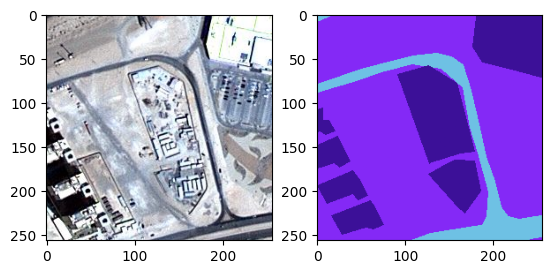

In [32]:
x = next(iter(train_loader))
plt.subplot(1,2,1)
plt.imshow(x[0][0].squeeze().permute(1,2,0))
plt.subplot(1,2,2)
plt.imshow(x[1][0].squeeze().permute(1,2,0))

In [6]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.double_conv(x)
    
    
class DownBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownBlock, self).__init__()
        self.double_conv = DoubleConv(in_channels, out_channels)
        self.down_sample = nn.MaxPool2d(2)

    def forward(self, x):
        skip_out = self.double_conv(x)
        down_out = self.down_sample(skip_out)
        return (down_out, skip_out)

    
class UpBlock(nn.Module):
    def __init__(self, in_channels, out_channels, up_sample_mode):
        super(UpBlock, self).__init__()
        if up_sample_mode == 'conv_transpose':
            self.up_sample = nn.ConvTranspose2d(in_channels-out_channels, in_channels-out_channels, kernel_size=2, stride=2)        
        elif up_sample_mode == 'bilinear':
            self.up_sample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            raise ValueError("Unsupported `up_sample_mode` (can take one of `conv_transpose` or `bilinear`)")
        self.double_conv = DoubleConv(in_channels, out_channels)

    def forward(self, down_input, skip_input):
        x = self.up_sample(down_input)
        x = torch.cat([x, skip_input], dim=1)
        return self.double_conv(x)

    
class UNet(nn.Module):
    def __init__(self, out_classes=3, up_sample_mode='conv_transpose'):
        super(UNet, self).__init__()
        self.up_sample_mode = up_sample_mode
        # Downsampling Path
        self.down_conv1 = DownBlock(3, 64)
        self.down_conv2 = DownBlock(64, 128)
        self.down_conv3 = DownBlock(128, 256)
        self.down_conv4 = DownBlock(256, 512)
        # Bottleneck
        self.double_conv = DoubleConv(512, 1024)
        # Upsampling Path
        self.up_conv4 = UpBlock(512 + 1024, 512, self.up_sample_mode)
        self.up_conv3 = UpBlock(256 + 512, 256, self.up_sample_mode)
        self.up_conv2 = UpBlock(128 + 256, 128, self.up_sample_mode)
        self.up_conv1 = UpBlock(128 + 64, 64, self.up_sample_mode)
        # Final Convolution
        self.conv_last = nn.Conv2d(64, out_classes, kernel_size=1)

    def forward(self, x):
        x, skip1_out = self.down_conv1(x)
        x, skip2_out = self.down_conv2(x)
        x, skip3_out = self.down_conv3(x)
        x, skip4_out = self.down_conv4(x)
        x = self.double_conv(x)
        x = self.up_conv4(x, skip4_out)
        x = self.up_conv3(x, skip3_out)
        x = self.up_conv2(x, skip2_out)
        x = self.up_conv1(x, skip1_out)
        x = self.conv_last(x)
        return x
    

# Get UNet model
model = UNet()

In [7]:
class diceloss(torch.nn.Module):
    def init(self):
        super(diceloss, self).init()
    def forward(self,pred, target):
       smooth = 1e-6
       iflat = pred.contiguous().view(-1)
       torchlat = target.contiguous().view(-1)
       intersection = (iflat * torchlat).sum()
       A_sum = torch.sum(iflat * iflat)
       B_sum = torch.sum(torchlat * torchlat)
       return 1 - ((2. * intersection + smooth) / (A_sum + B_sum + smooth) )

In [8]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=0.0008),
])

criterion = diceloss()

In [9]:
def Train_model(
        model,
        data_loader,
        criterion,
        optim,
        metrix,
):
    losses= []
    iou = []
    localization_error=[]
    Jaccard = []
    model.train()
    for img , msk in data_loader:
        img, msk = img.to(DEVICE), msk.to(DEVICE)

        logits = model(img)
        loss = criterion(msk, logits)
        result = metrix.calculate(
            msk.squeeze().cpu().numpy(),
            logits.squeeze().detach().cpu().numpy(),
            strict=True,
            iou_threshold=0.7
        ) 
        optim.zero_grad()
        loss.backward()
        optim.step()
        losses.append(loss.detach().cpu()); iou.append(result.results.IoU);localization_error.append(result.results.localization_error);Jaccard.append(result.results.Jaccard)
    print(f"Train Loss: {np.array(losses).mean() :.4f} | Train IoU: {np.array(iou).mean() :4f} | Train Jaccard: {np.array(Jaccard).mean():4f} | Trian Localization Error: {np.array(localization_error).mean():4f}")
    return np.array(losses).mean(), np.array(iou).mean(), np.array(Jaccard).mean(), np.array(localization_error).mean()

def Test_model(
        model,
        data_loader,
        criterion,
        metrix,):
    losses= []
    iou = []
    localization_error=[]
    Jaccard = []
    model.eval()
    with torch.inference_mode():
        for img, msk in data_loader:
            img, msk = img.to(DEVICE), msk.to(DEVICE)
            logits = model(img)
            loss = criterion(logits, msk)
            result = metrix.calculate(
            msk.squeeze().cpu().numpy(),
            logits.squeeze().detach().cpu().numpy(),
            strict=True,
            iou_threshold=0.7
        ) 
            losses.append(loss.detach().cpu()); iou.append(result.results.IoU);localization_error.append(result.results.localization_error);Jaccard.append(result.results.Jaccard)
    print(f"Test Loss: {np.array(losses).mean() :.4f} | Test IoU: {np.array(iou).mean() :4f} | Test Jaccard: {np.array(Jaccard).mean():4f} | Test Localization Error: {np.array(localization_error).mean():4f}")
    return np.array(losses).mean(), np.array(iou).mean(), np.array(Jaccard).mean(), np.array(localization_error).mean()


In [10]:
losses = []
ious = []
localization_errors=[]
Jaccards = []
tlosses=[]
tiou = []
tlocalization_error=[]
tJaccard= []

In [11]:
import umetrix

In [25]:
model.to(DEVICE)
for i in range(10):
    print(f"{'#'*20} Epoch {i} {'#'*20}")
    print("Training....")
    l, iou, jaccard, le= Train_model(model, train_loader, criterion, optimizer, umetrix)
    losses.append(l); ious.append(iou); Jaccards.append(jaccard); localization_errors.append(le)
    print("Testing.......")
    lt, iout, jaccardt, let = Test_model(model, test_loader, criterion, umetrix)
    tlosses.append(lt); tiou.append(iout); tJaccard.append(jaccardt); tlocalization_error.append(let) 


#################### Epoch 0 ####################
Training....
Train Loss: 0.0400 | Train IoU: 0.994452 | Train Jaccard: 1.000000 | Trian Localization Error: 0.427528
Testing.......
Test Loss: 0.0316 | Test IoU: 0.999806 | Test Jaccard: 1.000000 | Test Localization Error: 0.012628
#################### Epoch 1 ####################
Training....
Train Loss: 0.0384 | Train IoU: 0.994452 | Train Jaccard: 1.000000 | Trian Localization Error: 0.521296
Testing.......
Test Loss: 0.0298 | Test IoU: 0.999806 | Test Jaccard: 1.000000 | Test Localization Error: 0.012628
#################### Epoch 2 ####################
Training....
Train Loss: 0.0389 | Train IoU: 0.994452 | Train Jaccard: 1.000000 | Trian Localization Error: 0.423773
Testing.......
Test Loss: 0.0323 | Test IoU: 0.999806 | Test Jaccard: 1.000000 | Test Localization Error: 0.012628
#################### Epoch 3 ####################
Training....
Train Loss: 0.0378 | Train IoU: 0.994398 | Train Jaccard: 1.000000 | Trian Localization Err

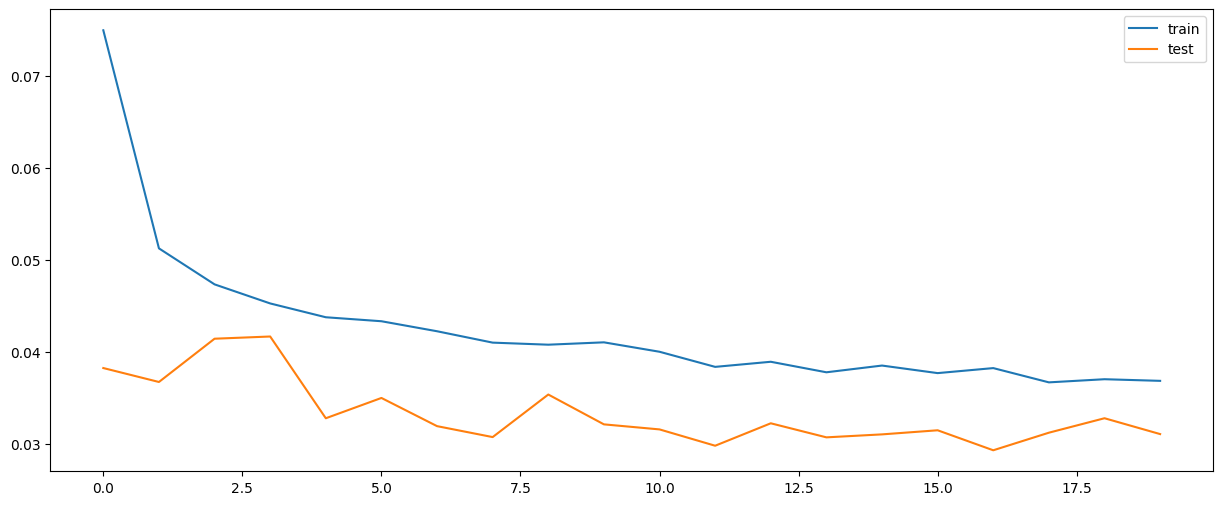

In [26]:
plt.figure(figsize=(15,6))
plt.plot(losses, label="train")
plt.plot(tlosses, label="test")
plt.legend()

In [27]:
d = iter(test_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


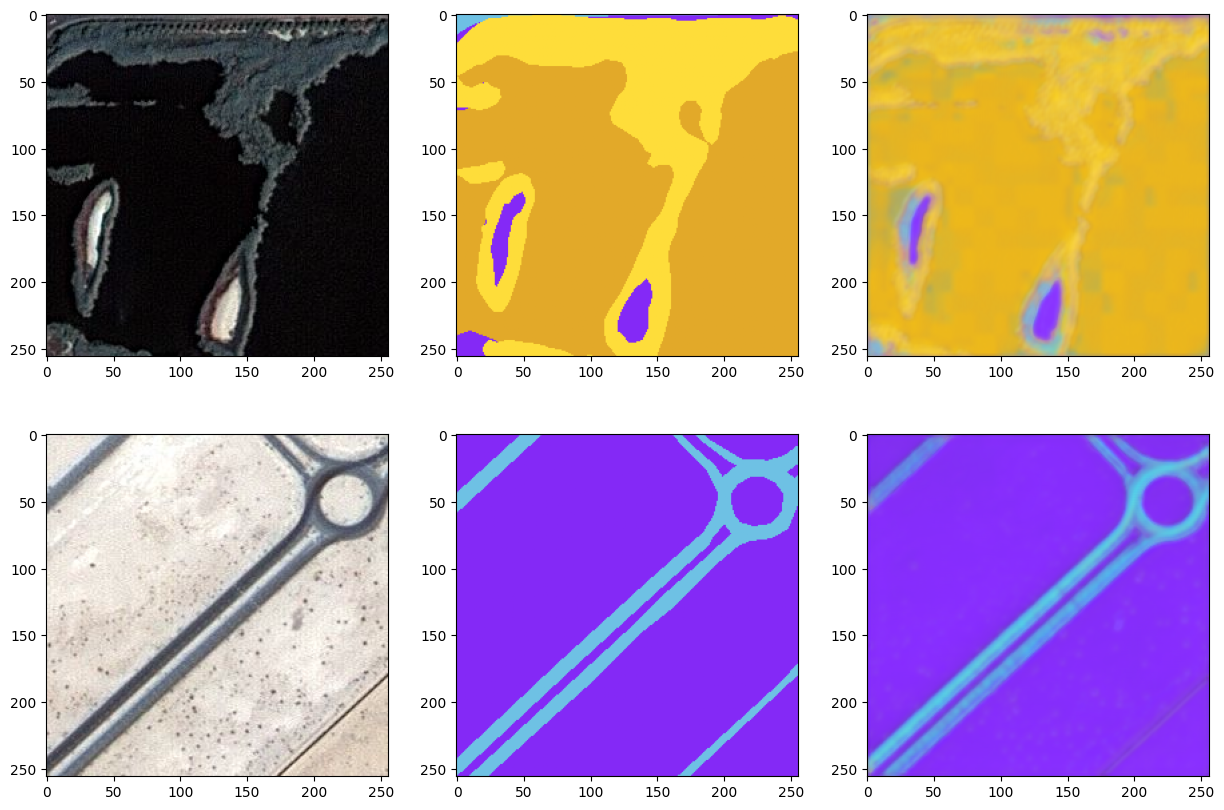

In [74]:
model.eval()
x = next(d)
with torch.no_grad():
    pred = model(x[0][0].unsqueeze(0).to(DEVICE))

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(x[0][0].squeeze().permute(1,2,0))
plt.subplot(2,3,2)
plt.imshow(x[1][0].squeeze().permute(1,2,0))
plt.subplot(2,3,3)
plt.imshow(pred.squeeze().cpu().permute(1,2,0))
with torch.no_grad():
    pred = model(x[0][1].unsqueeze(0).to(DEVICE))
plt.subplot(2,3,4)
plt.imshow(x[0][1].squeeze().permute(1,2,0))
plt.subplot(2,3,5)
plt.imshow(x[1][1].squeeze().permute(1,2,0))
plt.subplot(2,3,6)
plt.imshow(pred.squeeze().cpu().permute(1,2,0))

torch.save(model, "../models/model_20_epoch_patchifyImages_0.0311.pth")
torch.save(model.state_dict(), "../models/model_state_dict_20_epoch_patchifyImages_0.0311.pth")


np.save("../metrics/model_20_epoch_patchifyImages_0.0311_losses", np.array(losses))
np.save("../metrics/model_20_epoch_patchifyImages_0.0311_ious", np.array(ious))
np.save("../metrics/model_20_epoch_patchifyImages_0.0311_localiztion_errors",np.array(localization_errors))
np.save("../metrics/model_20_epoch_patchifyImages_0.0311_Jaccards",np.array(Jaccards))
np.save("../metrics/model_20_epoch_patchifyImages_0.0311_TestLosses",np.array(tlosses))
np.save("../metrics/model_20_epoch_patchifyImages_0.0311_TestIoUs",np.array(tiou))
np.save("../metrics/model_20_epoch_patchifyImages_0.0311_TestLocalizationErrors",np.array(tlocalization_error))
np.save("../metrics/model_20_epoch_patchifyImages_0.0311_TestJaccards",np.array(tJaccard))